# Extra credit 

In [449]:
import numpy as np
import urllib.request
import zipfile
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sma
import seaborn as sns
%pylab inline

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

%pylab inline
from PIL import Image

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['all']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 1. Data Cleaning

In [3]:
urllib.request.urlretrieve("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD","accidents.csv")

('accidents.csv', <http.client.HTTPMessage at 0x7f033f1f9ef0>)

In [46]:
collisions = pd.read_csv('accidents.csv')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
collisions['DATE'] = pd.to_datetime(collisions['DATE'])

In [49]:
collisions = collisions[(collisions['DATE']>="2016-09-01") & (collisions['DATE']<"2018-09-01")]
collisions.sort_values(by='DATE',ascending=False).head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
49401,2018-08-31,22:50,BRONX,10453,40.848286,-73.916180,"(40.848286, -73.91618)",WEST 175 STREET,MACOMBS ROAD,NaN,...,NaN,NaN,NaN,NaN,3971707,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
49330,2018-08-31,20:08,NaN,NaN,40.604153,-74.051980,"(40.604153, -74.05198)",VERRAZANO BRIDGE UPPER,NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,3973998,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN
49323,2018-08-31,20:00,MANHATTAN,10035,40.800480,-73.935165,"(40.80048, -73.935165)",NaN,NaN,2371 2 AVENUE,...,Unspecified,NaN,NaN,NaN,3973358,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
49324,2018-08-31,20:00,QUEENS,11357,40.782642,-73.804146,"(40.782642, -73.804146)",FRANCIS LEWIS BOULEVARD,17 ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3972070,Sedan,Sedan,NaN,NaN,NaN
49325,2018-08-31,20:00,NaN,NaN,40.670860,-73.874240,"(40.67086, -73.87424)",BLAKE AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3973510,Sedan,NaN,NaN,NaN,NaN


In [50]:
collisions.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [51]:
collisions.columns = map(str.lower, collisions.columns)
collisions.columns =collisions.columns.str.replace(' ', '-')

In [52]:
collisions.dtypes

date                             datetime64[ns]
time                                     object
borough                                  object
zip-code                                 object
latitude                                float64
longitude                               float64
location                                 object
on-street-name                           object
cross-street-name                        object
off-street-name                          object
number-of-persons-injured               float64
number-of-persons-killed                float64
number-of-pedestrians-injured             int64
number-of-pedestrians-killed              int64
number-of-cyclist-injured                 int64
number-of-cyclist-killed                  int64
number-of-motorist-injured                int64
number-of-motorist-killed                 int64
contributing-factor-vehicle-1            object
contributing-factor-vehicle-2            object
contributing-factor-vehicle-3           

In [53]:
#calculate the number of injured and killed people
collisions['injured'] = collisions['number-of-persons-injured']+collisions['number-of-pedestrians-injured']+\
collisions['number-of-cyclist-injured']+collisions['number-of-motorist-injured']
collisions['killed'] = collisions['number-of-persons-killed']+collisions['number-of-pedestrians-killed']+\
collisions['number-of-cyclist-killed']+collisions['number-of-motorist-killed']
collisions.head()

,date,time,borough,zip-code,latitude,longitude,location,on-street-name,cross-street-name,off-street-name,...,contributing-factor-vehicle-4,contributing-factor-vehicle-5,unique-key,vehicle-type-code-1,vehicle-type-code-2,vehicle-type-code-3,vehicle-type-code-4,vehicle-type-code-5,injured,killed
4815,2018-07-22,15:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97 WEST DRIVE,...,NaN,NaN,3946848,Bike,NaN,NaN,NaN,NaN,2.0,0.0
6604,2018-07-20,20:35,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,3946876,Pick-up Truck,Sedan,NaN,NaN,NaN,0.0,0.0
6629,2018-07-19,1:50,NaN,NaN,40.82894,-73.83695,"(40.82894, -73.83695)",BRUCKNER EXPRESSWAY,NaN,NaN,...,NaN,NaN,3944568,Sedan,NaN,NaN,NaN,NaN,0.0,0.0
6729,2018-07-18,12:00,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,JUNCTION BOULEVARD,NaN,...,NaN,NaN,3944551,Sedan,NaN,NaN,NaN,NaN,0.0,0.0
6854,2018-07-17,17:50,NaN,NaN,NaN,NaN,NaN,FDR DRIVE,NaN,NaN,...,NaN,NaN,3943238,Sedan,Sedan,NaN,NaN,NaN,2.0,0.0


In [84]:
#drop the columns I do not need
killed = collisions[['date','killed']]
injured = collisions[['date','injured']]

In [85]:
killed.shape

(458489, 2)

In [86]:
killed.head()

,date,killed
4815,2018-07-22,0.0
6604,2018-07-20,0.0
6629,2018-07-19,0.0
6729,2018-07-18,0.0
6854,2018-07-17,0.0


In [87]:
injured.shape

(458489, 2)

In [88]:
injured.head()

,date,injured
4815,2018-07-22,2.0
6604,2018-07-20,0.0
6629,2018-07-19,0.0
6729,2018-07-18,0.0
6854,2018-07-17,2.0


## 2.Analysis-Time plotting

In [99]:
collisions.date = pd.to_datetime(collisions.date)

(array([ 736177.,  736269.,  736361.,  736450.,  736542.,  736634.,
         736726.,  736815.,  736907.]), <a list of 9 Text xticklabel objects>)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


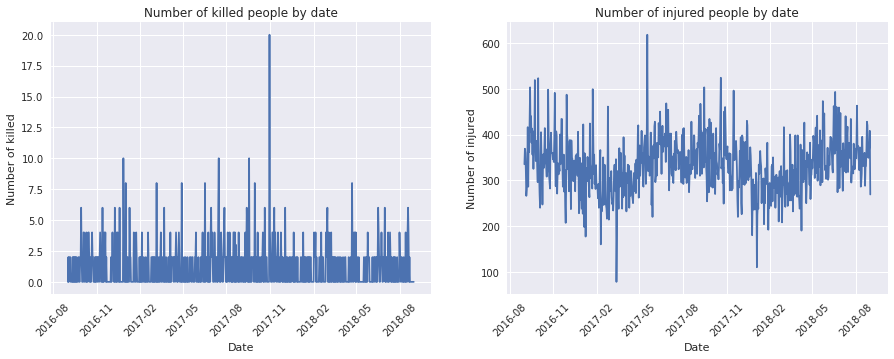

In [103]:
killed = collisions[['date','killed']]
injured = collisions[['date','injured']]

killed = killed.groupby('date').sum()
injured = injured.groupby('date').sum()

fig = plt.figure(figsize=(15,5))
ax1= fig.add_subplot(121)
ax1.plot(killed.index,killed.killed)
ax1.set_title('Number of killed people by date')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of killed')
plt.xticks(rotation=45)

ax2= fig.add_subplot(122)
ax2.plot(injured.index,injured.injured)
ax2.set_title('Number of injured people by date')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of injured')
plt.xticks(rotation=45)

## Event Detection

In [118]:
killed.head()
a = killed[killed['killed']== 20]
a

,killed
date,
2017-10-31,20.0


In [448]:
myImage = Image.open("_98561374_mediaitem98561369.jpg")
myImage.show()

## time plot colored by season

In [419]:
def season_calc(row):
    if row.month <4:
        val = 'winter'
    elif (row.month >=4 and row.month<6):
        val = 'spring'
    elif (row.month >=6 and row.month<9):
        val = 'summer'
    elif (row.month >=9 and row.month<12):
        val = 'fall'
    else :
        val = 'winter'
    return val

In [122]:
injured['month'] = injured.index.month

In [241]:
injured['season'] = injured.apply(season_calc,axis=1)
injured.head()

,injured,month,season,lag_injured
date,,,,
2016-09-01,335.0,9,fall,NaN
2016-09-02,369.0,9,fall,335.0
2016-09-03,360.0,9,fall,369.0
2016-09-04,321.0,9,fall,360.0
2016-09-05,266.0,9,fall,321.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


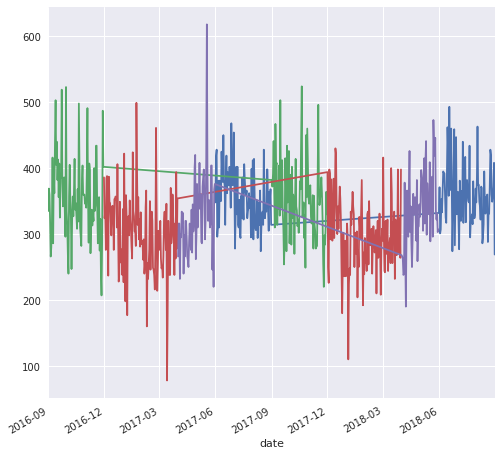

In [242]:
plt.figure(figsize=(8,8))
injured[injured.season == 'summer'].injured.plot()
injured[injured.season=='summer'].injured
injured[injured.season == 'fall'].injured.plot()
injured[injured.season == 'winter'].injured.plot()
injured[injured.season == 'spring'].injured.plot()

In [420]:
armaall['month'] =armaall['date'].dt.month
armaall['season'] = armaall.apply(season_calc,axis=1)
armaall.head()

,date,killed,injured,severity,month,season
0,2016-09-01,0.0,335.0,1005.0,9,fall
1,2016-09-02,2.0,369.0,1125.0,9,fall
2,2016-09-03,0.0,360.0,1080.0,9,fall
3,2016-09-04,2.0,321.0,981.0,9,fall
4,2016-09-05,2.0,266.0,816.0,9,fall


In [421]:
armaall1 = armaall.set_index('date')

Text(0.5,1,'Severity of collisions by day')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


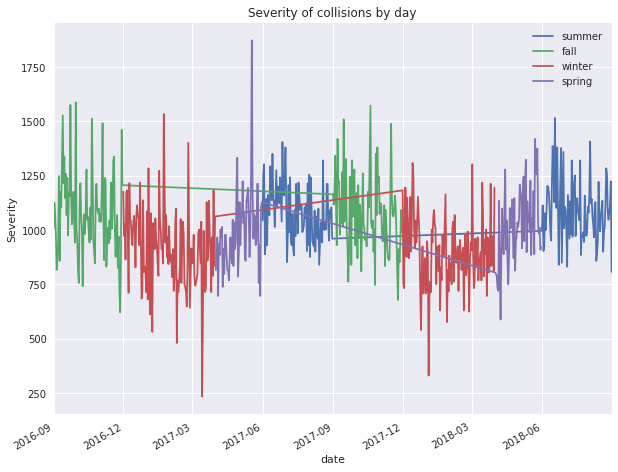

In [422]:
plt.figure(figsize=(10,8))
armaall1[armaall1.season == 'summer'].severity.plot(label='summer',legend=True)
armaall1[armaall1.season == 'fall'].severity.plot(label='fall',legend=True)
armaall1[armaall1.season == 'winter'].severity.plot(label='winter',legend=True)
armaall1[armaall1.season == 'spring'].severity.plot(label='spring',legend=True)
plt.ylabel('Severity')
plt.title('Severity of collisions by day')

In [426]:
killed.head()

,killed,lag_killed
date,,
2016-09-01,0.0,NaN
2016-09-02,2.0,0.0
2016-09-03,0.0,2.0
2016-09-04,2.0,0.0
2016-09-05,2.0,2.0


In [429]:
injured.head()

,injured,month,season,lag_injured
date,,,,
2016-09-01,335.0,9,fall,NaN
2016-09-02,369.0,9,fall,335.0
2016-09-03,360.0,9,fall,369.0
2016-09-04,321.0,9,fall,360.0
2016-09-05,266.0,9,fall,321.0


In [427]:
killedcum = killed.cumsum()
injuredcum = injured.cumsum()

In [431]:
killedcum.head()

,killed,lag_killed
date,,
2016-09-01,0.0,NaN
2016-09-02,2.0,0.0
2016-09-03,2.0,2.0
2016-09-04,4.0,2.0
2016-09-05,6.0,4.0


In [432]:
injuredcum.head()

,injured,month,season,lag_injured
date,,,,
2016-09-01,335,9,fall,NaN
2016-09-02,704,18,fallfall,335
2016-09-03,1064,27,fallfallfall,704
2016-09-04,1385,36,fallfallfallfall,1064
2016-09-05,1651,45,fallfallfallfallfall,1385


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


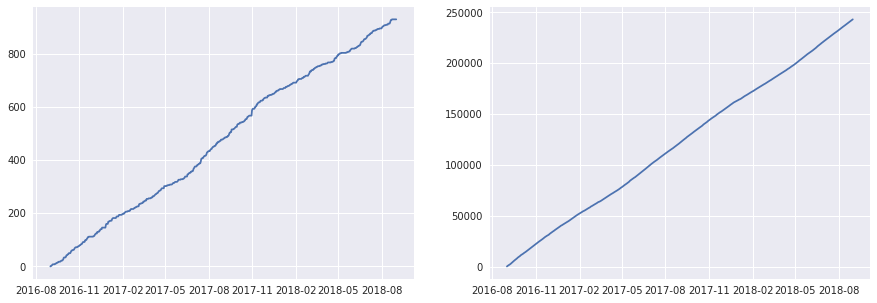

In [433]:
fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
ax1.plot(killedcum['killed'])
ax2=fig.add_subplot(122)
ax2.plot(injuredcum['injured'])

In [434]:
import statsmodels.formula.api as smf

In [435]:
killed['lag_killed'] = killed['killed'].shift()
modkilled = smf.ols(formula="killed~lag_killed",data=killed).fit()
print(modkilled.summary())

                            OLS Regression Results                            
Dep. Variable:                 killed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01710
Date:                Fri, 14 Dec 2018   Prob (F-statistic):              0.896
Time:                        12:27:09   Log-Likelihood:                -1483.8
No. Observations:                 729   AIC:                             2972.
Df Residuals:                     727   BIC:                             2981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2682      0.083     15.209      0.0

In [436]:
injured['lag_injured'] = injured['injured'].shift()
modinjured = smf.ols(formula="injured~lag_injured",data=injured).fit()
print(modinjured.summary())

                            OLS Regression Results                            
Dep. Variable:                injured   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     102.7
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           1.15e-22
Time:                        12:27:10   Log-Likelihood:                -3980.9
No. Observations:                 729   AIC:                             7966.
Df Residuals:                     727   BIC:                             7975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     215.8091     11.768     18.338      

## explore autocorrelation

## injured--ARMA

Text(0,0.5,'$\\rho$')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


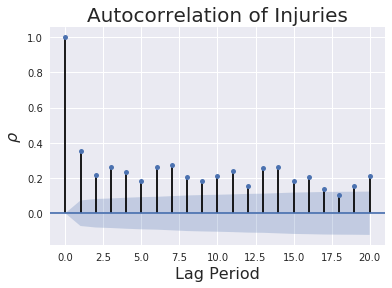

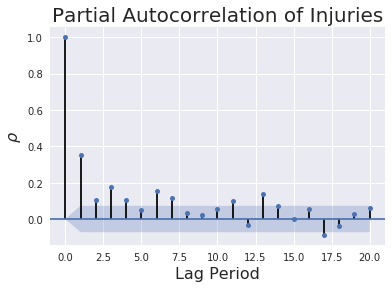

In [437]:
plt.figure(figsize=(10,10))
sma.graphics.tsa.plot_acf(injured.injured.values.squeeze(),lags=20)
plt.title(r'Autocorrelation of Injuries', fontsize=20)
plt.xlabel('Lag Period', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

sma.graphics.tsa.plot_pacf(injured.injured.values.squeeze(),lags=20)
plt.title(r'Partial Autocorrelation of Injuries', fontsize=20)
plt.xlabel('Lag Period', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

In [248]:
print ("P-value for unit root (stationarity)")
print("p-value: %.2f"%sm.tsa.adfuller(injured.injured)[1])

P-value for unit root (stationarity)
p-value: 0.04


In [249]:
injured.dtypes

injured        float64
month            int32
season          object
lag_injured    float64
dtype: object

In [214]:
np.asarray(injured)

array([[335.0, 9, 'fall', nan],
       [369.0, 9, 'fall', 335.0],
       [360.0, 9, 'fall', 369.0],
       ..., 
       [372.0, 8, 'summer', 359.0],
       [408.0, 8, 'summer', 372.0],
       [269.0, 8, 'summer', 408.0]], dtype=object)

In [252]:
datelist = injured.index.values

In [250]:
injured.head()

,injured,month,season,lag_injured
date,,,,
2016-09-01,335.0,9,fall,NaN
2016-09-02,369.0,9,fall,335.0
2016-09-03,360.0,9,fall,369.0
2016-09-04,321.0,9,fall,360.0
2016-09-05,266.0,9,fall,321.0


In [256]:
arin = injured[['injured']]

In [291]:
dataar = injured[['injured']]
dataar.head()

,injured
date,
2016-09-01,335.0
2016-09-02,369.0
2016-09-03,360.0
2016-09-04,321.0
2016-09-05,266.0


In [297]:
dataarr = dataar.reset_index()
dataarr.head()

,date,injured
0,2016-09-01,335.0
1,2016-09-02,369.0
2,2016-09-03,360.0
3,2016-09-04,321.0
4,2016-09-05,266.0


In [299]:
dataarr.dtypes

date       datetime64[ns]
injured           float64
dtype: object

In [311]:
ar_injured = sm.tsa.AR(dataarr['injured'],dates=dataarr['date']).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(ar_injured.resid.values))


residuals : dubrin_watson test 2.00399201788


In [364]:
arma_injured = sm.tsa.ARMA(dataarr['injured'],(1,2),dates=dataarr['date']).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(ar_injured2.resid.values))
arma_injured.summary()

residuals : dubrin_watson test 1.99581382064


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                injured   No. Observations:                  730
Model:                     ARMA(1, 2)   Log Likelihood               -3948.704
Method:                       css-mle   S.D. of innovations             54.040
Date:                Thu, 13 Dec 2018   AIC                           7907.407
Time:                        23:18:33   BIC                           7930.373
Sample:                    09-01-2016   HQIC                          7916.268
                         - 08-31-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           336.3300     12.546     26.809      0.000       311.741   360.919
ar.L1.injured     0.9862      0.008    125.485      0.000         0.971     1.002
ma.L1.injured    -0.7608      0.039    -19.378      0.000        -0.838    -0.684
ma.L2.injured    -0.1470      0.038     -3.820      0.000        -0.222    -0.072
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0140           +0.0000j            1.0140            0.0000
MA.1            1.0864           +0.0000j            1.0864            0.0000
MA.2           -6.2613           +0.0000j            6.2613            0.5000
-----------------------------------------------------------------------------
"""

In [365]:
onlyinjured = injured[['injured']]
onlyinjured.head()

,injured
date,
2016-09-01,335.0
2016-09-02,369.0
2016-09-03,360.0
2016-09-04,321.0
2016-09-05,266.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


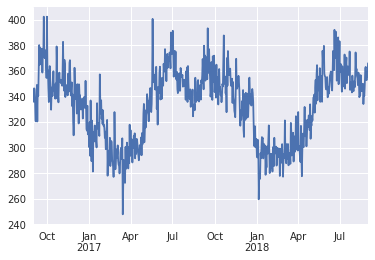

In [366]:
arma_injured.predict().plot()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


Text(0.5,1,'arma51')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


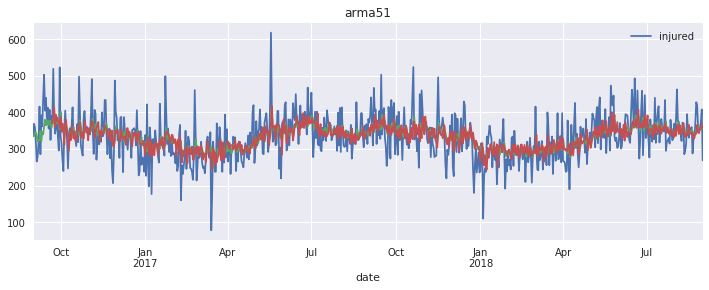

In [367]:
ax = onlyinjured.plot(figsize=(12,4));

prediction = arma_injured.predict()
prediction.plot()
predictionar = ar_injured.predict()
predictionar.plot()
ax.set_title("arma51")

In [369]:
injured.head()

,injured,month,season,lag_injured
date,,,,
2016-09-01,335.0,9,fall,NaN
2016-09-02,369.0,9,fall,335.0
2016-09-03,360.0,9,fall,369.0
2016-09-04,321.0,9,fall,360.0
2016-09-05,266.0,9,fall,321.0


In [370]:
dataarr.head()

,date,injured
0,2016-09-01,335.0
1,2016-09-02,369.0
2,2016-09-03,360.0
3,2016-09-04,321.0
4,2016-09-05,266.0


## Severity -ARMA

In [383]:
alldata = collisions [['killed','injured','date']]
alldata['severity'] = alldata['injured']*3+alldata['killed']*9


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [384]:
alldata.head()

,killed,injured,date,severity
4815,0.0,2.0,2018-07-22,6.0
6604,0.0,0.0,2018-07-20,0.0
6629,0.0,0.0,2018-07-19,0.0
6729,0.0,0.0,2018-07-18,0.0
6854,0.0,2.0,2018-07-17,6.0


In [385]:
alldata = alldata.groupby('date').sum()
alldata.head()

,killed,injured,severity
date,,,
2016-09-01,0.0,335.0,1005.0
2016-09-02,2.0,369.0,1125.0
2016-09-03,0.0,360.0,1080.0
2016-09-04,2.0,321.0,981.0
2016-09-05,2.0,266.0,816.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


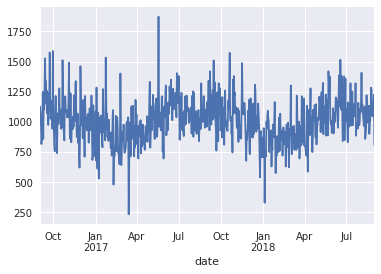

In [389]:
armaall = alldata.reset_index()

In [395]:
armaall.head()

,date,killed,injured,severity
0,2016-09-01,0.0,335.0,1005.0
1,2016-09-02,2.0,369.0,1125.0
2,2016-09-03,0.0,360.0,1080.0
3,2016-09-04,2.0,321.0,981.0
4,2016-09-05,2.0,266.0,816.0


In [396]:
armaall.to_csv('armaall.csv')

In [ ]:
plt.figure(figsize=(10,10))
sma.graphics.tsa.plot_acf(injured.injured.values.squeeze(),lags=20)
plt.title(r'Autocorrelation of Injuries', fontsize=20)
plt.xlabel('Lag Period', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

sma.graphics.tsa.plot_pacf(injured.injured.values.squeeze(),lags=20)
plt.title(r'Partial Autocorrelation of Injuries', fontsize=20)
plt.xlabel('Lag Period', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

In [392]:
arma_severity = sm.tsa.ARMA(alldata['severity'],(3,2),dates=armaall['date']).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(arma_severity.resid.values))
arma_severity.summary()

residuals : dubrin_watson test 1.99386595282


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               severity   No. Observations:                  730
Model:                     ARMA(3, 2)   Log Likelihood               -4759.210
Method:                       css-mle   S.D. of innovations            164.022
Date:                Thu, 13 Dec 2018   AIC                           9532.421
Time:                        23:27:54   BIC                           9564.572
Sample:                    09-01-2016   HQIC                          9544.825
                         - 08-31-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const           1019.4186     37.559     27.142      0.000       945.804  1093.033
ar.L1.severity     0.7953      0.307      2.589      0.010         0.193     1.397
ar.L2.severity     0.1710      0.353      0.484      0.628        -0.521     0.863
ar.L3.severity     0.0162      0.063      0.256      0.798        -0.108     0.140
ma.L1.severity    -0.5827      0.305     -1.909      0.057        -1.181     0.016
ma.L2.severity    -0.3022      0.283     -1.070      0.285        -0.856     0.251
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0147           -0.0000j            1.0147           -0.0000
AR.2           -5.7771           -5.2310j            7.7935           -0.3829
AR.3           -5.7771           +5.2310j            7.7935            0.3829
MA.1            1.0946           +0.0000j            1.0946            0.0000
MA.2           -3.0225           +0.0000j            3.0225            0.5000
-----------------------------------------------------------------------------
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


Text(0,0.5,'Severity')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


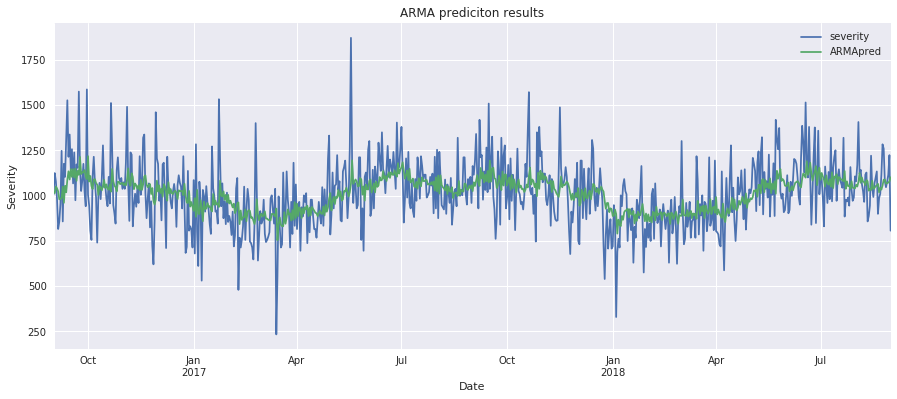

In [451]:
alldata['severity'].plot(figsize=(15,6),legend= True)
prediction = arma_severity.predict()
prediction.plot(label='ARMApred',legend=True)
plt.title('ARMA prediciton results')
plt.xlabel('Date')
plt.ylabel('Severity')

The figure above shows the  ARMA model predicition resutls which is not good enough to predict the severity level of collisions.